Note: In general there are 400 frames in each hyperstack. They are organized as stacks of 16 frames of 25 slices each.
Some hyperstacks have fewer frames because I felt like it that's why!!

In [1]:
# Tutorial code is here: https://soft-matter.github.io/trackpy/dev/tutorial/walkthrough.html
# Video frames: https://nbviewer.jupyter.org/github/soft-matter/pims/blob/master/examples/loading%20video%20frames.ipynb
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# Animation stuff

from matplotlib import animation, rc
from IPython.display import HTML

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import os
import pims
import trackpy as tp

In [303]:
?pims.ImageReaderND

In [420]:
img_dir = '/Users/Sasha/Documents/Research/Weber_lab_ENDs/images/hyperstacks'

In [421]:
img_name = '20180619_WLW2_Dau5GFP_hyperstack.tif'
frames = pims.open(os.path.join(img_dir, img_name), as_grey=True)

In [426]:
frames

<Frames>
Source: /Users/Sasha/Documents/Research/Weber_lab_ENDs/images/hyperstacks/20180619_WLW2_Dau5GFP_hyperstack.tif
Length: 400 frames
Frame Shape: (512, 512)
Pixel Datatype: uint16

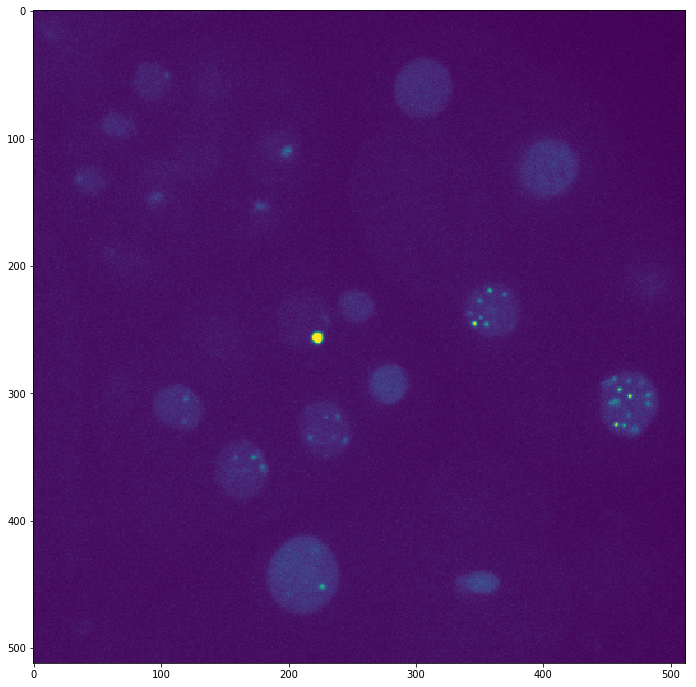

In [422]:
plt.figure(figsize=(12,12))
plt.imshow(frames[9])

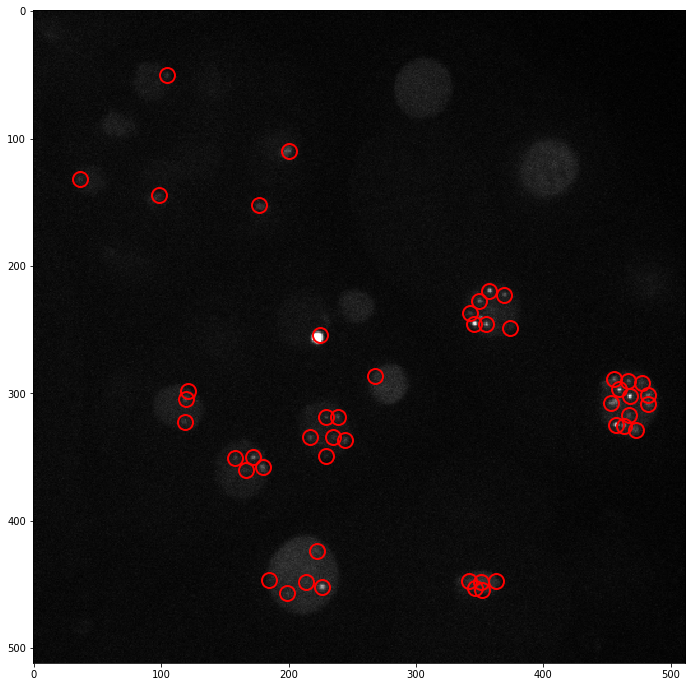

In [200]:
f = tp.locate(frames[9], diameter=5, minmass=5000, maxsize=3)  
plt.figure(figsize=(12,12))
tp.annotate(f, frames[9])

In [105]:
frame_subset = frames[9][270:350,420:510]

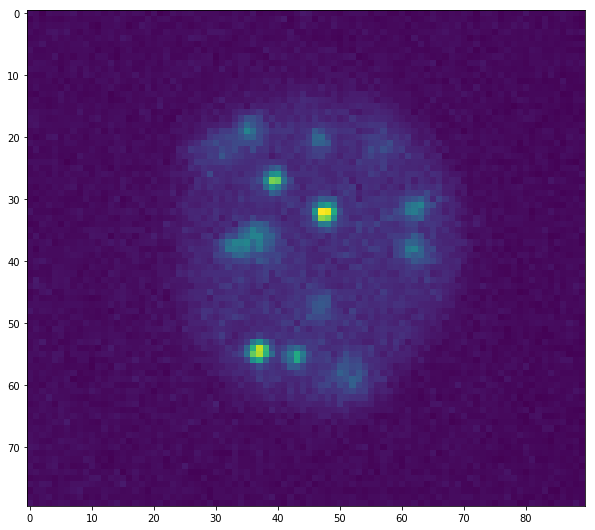

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(frame_subset)

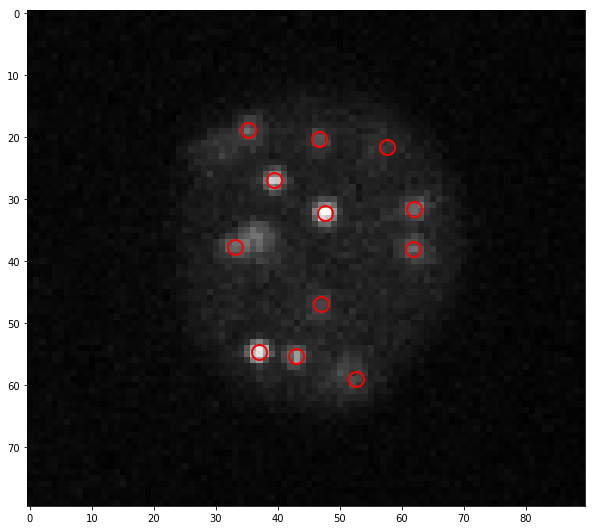

In [186]:
f = tp.locate(frame_subset, diameter=5, minmass=5000, maxsize=3) 
plt.figure(figsize=(10,10))
tp.annotate(f, frame_subset)

In [175]:
?tp.locate

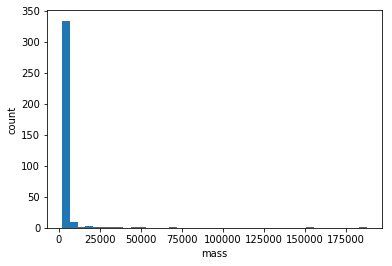

In [184]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=40)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [69]:
f

y           x           mass      size       ecc        signal  \
24    18.655684  269.761312    9938.747086  1.872671  0.156922    901.636616   
81    48.438162  415.042723    6676.333907  1.980751  0.194574    627.144943   
162   94.267067  313.688915    8019.898413  1.871372  0.236140    777.541190   
191  110.522917  283.329490   11565.323249  1.999047  0.149995    770.873376   
367  195.613390  478.141271  130855.848232  1.832368  0.114249  10211.757023   
378  204.727237  488.132285   62619.663152  1.735502  0.142244   6134.018375   
413  224.748627   29.011229    7620.200011  1.950932  0.232859    643.073609   
432  234.023544  115.853032    7080.107084  1.809926  0.049120    547.501610   
440  239.167381  222.131217    5787.292051  1.975576  0.107661    700.490896   
519  283.537710   38.658039    4322.225158  1.949262  0.069729    489.343455   
538  293.936145  325.187269    7500.920229  1.878357  0.027536    602.325858   
570  311.953486  473.076346    7549.817531  1.744035  0.211544    713.826524   
585  318.440583  400.673453   93261.231599  1.783637  0.083324   7715.401577   
587  324.706732  225.576500   10999.299934  1.872552  0.048576    961.646941   
672  367.709875  353.149399    8841.891696  1.932163  0.071180    696.416121   
918  503.083812  354.166188    5675.050516  1.862681  0.151533    529.720773   

     raw_mass        ep  frame  
24   414262.0  0.577955     15  
81   283687.0 -0.204059     15  
162  403308.0  0.851803     15  
191  395994.0  1.246005     15  
367  797228.0  0.047219     15  
378  750368.0  0.053197     15  
413  384545.0  4.521443     15  
432  377987.0 -8.940047     15  
440  419456.0  0.501505     15  
519  376050.0 -4.756925     15  
538  346909.0 -0.591702     15  
570  385563.0  3.664832     15  
585  699063.0  0.061756     15  
587  476253.0  0.204992     15  
672  361058.0 -1.029299     15  
918  371547.0 -2.278483     15

In [455]:
# Test a selection of a full animation on one level of the z-plane
# We want every 25th observation for a given level of the z-plane
# So start with the plane level and add 25 til we hit the max
init_frame = 8
frame_list = [(25*i + init_frame) for i in range(0,16)]

In [456]:
frame_tl = frames[frame_list]

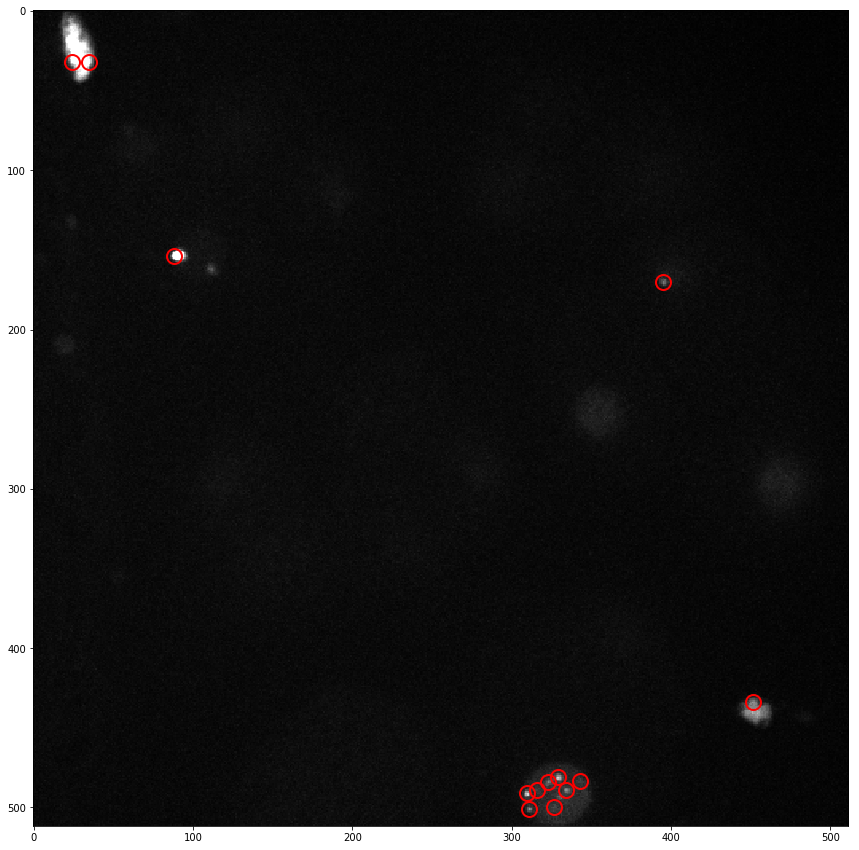

In [461]:
# Note: Seems like nucleoli are greater than 1.3 in size
time_point = 7
f = tp.locate(frame_tl[time_point], diameter=5, minmass=5000, maxsize=1.3)  
plt.figure(figsize=(15,15))
tp.annotate(f, frame_tl[time_point])

In [462]:
f

y           x          mass      size       ecc        signal  \
244    31.635978   24.240840  35417.413234  1.299393  0.099119   4863.564055   
245    31.925642   34.906688  40644.201148  1.276289  0.087677   5691.879090   
1226  153.902020   88.084993  66999.196226  1.297170  0.116921   8377.814923   
1351  170.225213  395.178522  34966.041563  1.253081  0.106690   5020.652372   
3494  433.789616  451.790031  24748.612690  1.262308  0.196662   3393.519235   
3871  481.165627  329.207644  59507.832735  1.194249  0.180857   9737.760725   
3887  483.060213  342.899292   9376.080309  1.222746  0.181270   1617.700978   
3895  483.941068  323.021959  22491.582841  1.176967  0.231141   3792.756793   
3932  489.154874  316.067144   5698.224360  1.204657  0.094518    986.432315   
3933  488.962726  334.335940  30858.593654  1.163914  0.364231   5462.934872   
3948  491.169795  309.699974  65375.664459  1.182366  0.193116  11238.845922   
4015  499.929836  326.720178   8232.045196  1.268092  0.013289   1171.131133   
4027  501.004828  310.998779  34702.970079  1.118422  0.254706   6653.787791   

      raw_mass        ep  frame  
244   697293.0  0.012281    183  
245   736269.0  0.011571    183  
1226  734797.0  0.011596    183  
1351  303169.0  0.032339    183  
3494  413399.0  0.022199    183  
3871  491281.0  0.018173    183  
3887  206984.0  0.053771    183  
3895  307170.0  0.031811    183  
3932  210223.0  0.052597    183  
3933  341328.0  0.027923    183  
3948  466470.0  0.019287    183  
4015  229835.0  0.046457    183  
4027  291654.0  0.033959    183

In [466]:
f = tp.batch(frame_tl,5,5000,11)

Frame 383: 0 features


In [468]:
t = tp.link_df(f, 5, memory=3)

Frame 333: 1 trajectories present.


In [469]:
t.head()

y           x          mass      size       ecc       signal  \
0    43.722400   85.130153  25417.655851  1.168919  0.225930  4571.644219   
27  313.998068  215.712688  31535.296148  1.171660  0.221858  5516.482283   
28  313.611565  227.034019  40284.582374  1.180091  0.128402  6958.900460   
29  314.206647  451.147327  14733.335853  1.077663  0.363341  3027.679080   
30  319.037965  465.346065  34325.806658  1.223425  0.419348  5836.016723   

    raw_mass        ep  frame  particle  
0   213772.0  0.050669      8         0  
27  248247.0  0.041238      8         1  
28  317705.0  0.029991      8         2  
29  191462.0  0.059470      8         3  
30  323324.0  0.029344      8         4

# 3D tracking

In [346]:
img_dir = '/Users/Sasha/Documents/Research/Weber_lab_ENDs/images/hyperstacks'
out_dir = '/Users/Sasha/Documents/Research/Weber_lab_ENDs/images/splits'
img_name = '20180619_WLW2_Dau5GFP_hyperstack.tif'
frames = pims.open(os.path.join(img_dir, img_name), as_grey=True)

In [358]:
img_name.split('.')[0]

'20180619_WLW2_Dau5GFP_hyperstack'

In [355]:
np.array(frames[0:24]).shape

(24, 512, 512)

In [356]:
# For each TIFF we have 512x512 in the x,y dimension, 25 z-frames, and (usually) 16 time points
# Divide by number of z slices to get the number of time points
num_z = 25
t_points = int(len(frames)/num_z)

In [365]:
# Strip file extension from image name
img_lab = img_name.split('.')[0]

# Split the file into each of its frames
for t in range(0,t_points):
    for z in range(0, num_z):
        plt.imsave(arr=np.array(frames[num_z*t+z]),
                   fname=os.path.join(out_dir, img_lab + '_z' + str(z).zfill(2) + '_t' + str(t).zfill(2)) + '.png')

In [400]:
?pims.ImageSequenceND

In [440]:
frames_3d = pims.ImageSequenceND(out_dir + '/*', axes_identifiers = ['z', 't'])#dtype='uint16')

In [441]:
frames_3d.bundle_axes = ['z','y','x']
frames_3d.iter_axes = 't'

In [442]:
frames_3d

<ImageSequenceND>
Source: /Users/Sasha/Documents/Research/Weber_lab_ENDs/images/splits/*
Axes: 5
Axis 'z' size: 25
Axis 't' size: 16
Axis 'y' size: 512
Axis 'x' size: 512
Axis 'c' size: 4
Pixel Datatype: float32

Frame([[[ 0.19215687,  0.1882353 ,  0.24705882, ...,  0.28235295,
          0.21568628,  0.27450982],
        [ 0.21568628,  0.26274511,  0.14901961, ...,  0.27450982,
          0.28235295,  0.27450982],
        [ 0.17254902,  0.26274511,  0.2       , ...,  0.28235295,
          0.25098041,  0.23921569],
        ..., 
        [ 0.20392157,  0.16862746,  0.17254902, ...,  0.21960784,
          0.21960784,  0.27450982],
        [ 0.14509805,  0.23921569,  0.2       , ...,  0.25098041,
          0.22352941,  0.27450982],
        [ 0.2       ,  0.20784314,  0.15686275, ...,  0.26274511,
          0.27843139,  0.28235295]],

       [[ 0.12156863,  0.1882353 ,  0.19215687, ...,  0.27843139,
          0.27843139,  0.26666668],
        [ 0.1882353 ,  0.15294118,  0.26274511, ...,  0.25098041,
          0.28235295,  0.27843139],
        [ 0.16470589,  0.22352941,  0.19215687, ...,  0.28235295,
          0.28235295,  0.28235295],
        ..., 
        [ 0.14901961,  0.17647059,  0.22745098, ...,  0.26274511,
          0.23137255,  0.27450982],
        [ 0.12941177,  0.19215687,  0.16470589, ...,  0.27450982,
          0.26666668,  0.25098041],
        [ 0.15294118,  0.16862746,  0.14117648, ...,  0.24313726,
          0.27058825,  0.18431373]],

       [[ 0.23921569,  0.21960784,  0.16078432, ...,  0.28235295,
          0.24705882,  0.27058825],
        [ 0.16862746,  0.20784314,  0.18431373, ...,  0.27843139,
          0.27843139,  0.27450982],
        [ 0.15686275,  0.17254902,  0.21960784, ...,  0.28235295,
          0.27843139,  0.28235295],
        ..., 
        [ 0.17647059,  0.12941177,  0.20784314, ...,  0.25098041,
          0.21960784,  0.22352941],
        [ 0.15294118,  0.15294118,  0.14901961, ...,  0.18039216,
          0.2       ,  0.27843139],
        [ 0.23921569,  0.19215687,  0.2       , ...,  0.1882353 ,
          0.25490198,  0.22352941]],

       ..., 
       [[ 0.28235295,  0.27843139,  0.28235295, ...,  0.27058825,
          0.26666668,  0.26666668],
        [ 0.28235295,  0.27843139,  0.28235295, ...,  0.26666668,
          0.27058825,  0.27843139],
        [ 0.27843139,  0.27843139,  0.27843139, ...,  0.27058825,
          0.27450982,  0.27058825],
        ..., 
        [ 0.28235295,  0.28235295,  0.27843139, ...,  0.27843139,
          0.27843139,  0.27843139],
        [ 0.28235295,  0.27450982,  0.28235295, ...,  0.28235295,
          0.27843139,  0.28235295],
        [ 0.27843139,  0.27450982,  0.28235295, ...,  0.27843139,
          0.28235295,  0.28235295]],

       [[ 0.27843139,  0.27843139,  0.27450982, ...,  0.27843139,
          0.27450982,  0.26666668],
        [ 0.27843139,  0.28235295,  0.28235295, ...,  0.26666668,
          0.27450982,  0.27450982],
        [ 0.28235295,  0.27843139,  0.27058825, ...,  0.27058825,
          0.27450982,  0.27843139],
        ..., 
        [ 0.27843139,  0.26666668,  0.28235295, ...,  0.27450982,
          0.27843139,  0.28235295],
        [ 0.27058825,  0.27058825,  0.27843139, ...,  0.27058825,
          0.25098041,  0.28235295],
        [ 0.28235295,  0.25882354,  0.27058825, ...,  0.28235295,
          0.27058825,  0.28235295]],

       [[ 0.28235295,  0.27843139,  0.26274511, ...,  0.27450982,
          0.27450982,  0.27450982],
        [ 0.26666668,  0.28235295,  0.27843139, ...,  0.27450982,
          0.27450982,  0.27058825],
        [ 0.27843139,  0.28235295,  0.28235295, ...,  0.26666668,
          0.27843139,  0.27450982],
        ..., 
        [ 0.27450982,  0.27843139,  0.27843139, ...,  0.28235295,
          0.27843139,  0.28235295],
        [ 0.27843139,  0.27058825,  0.27843139, ...,  0.27058825,
          0.27058825,  0.27843139],
        [ 0.27450982,  0.25882354,  0.27450982, ...,  0.27450982,
          0.25882354,  0.27450982]]], dtype=float32)
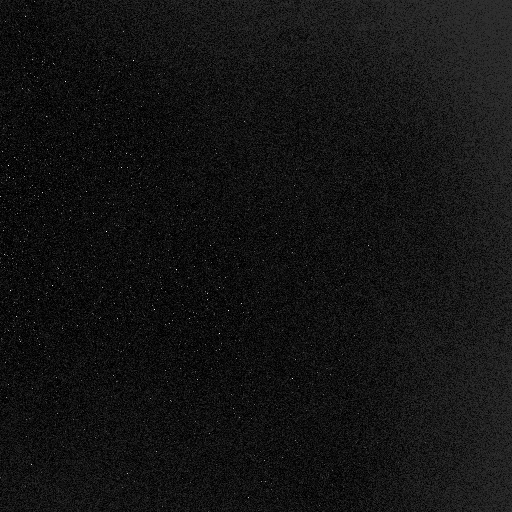
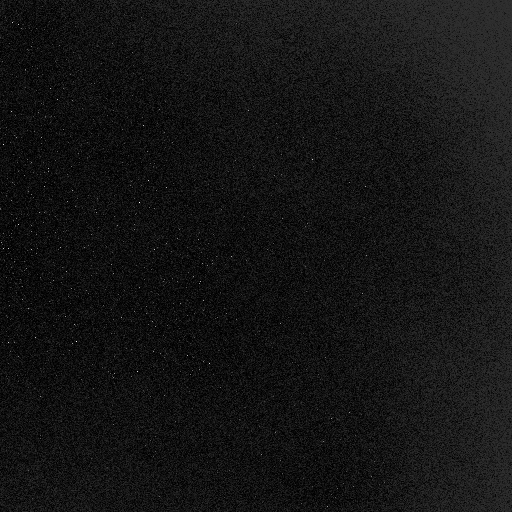
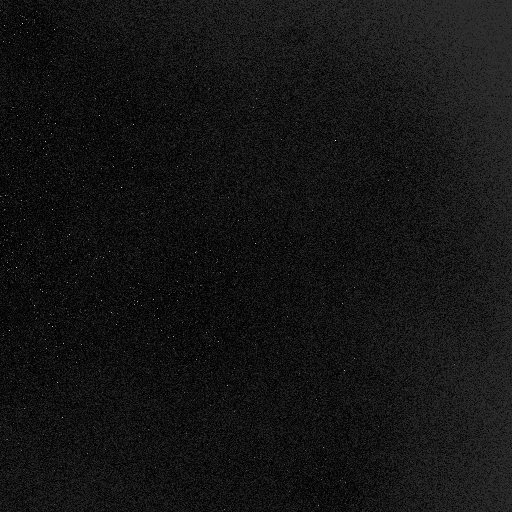
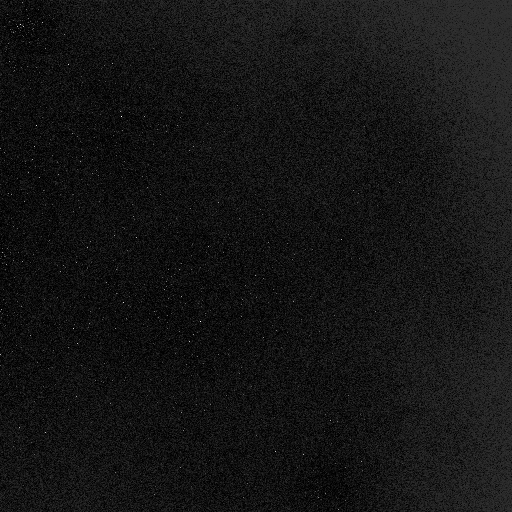
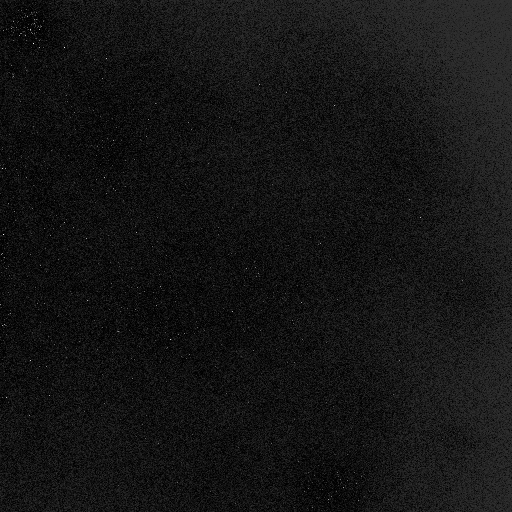
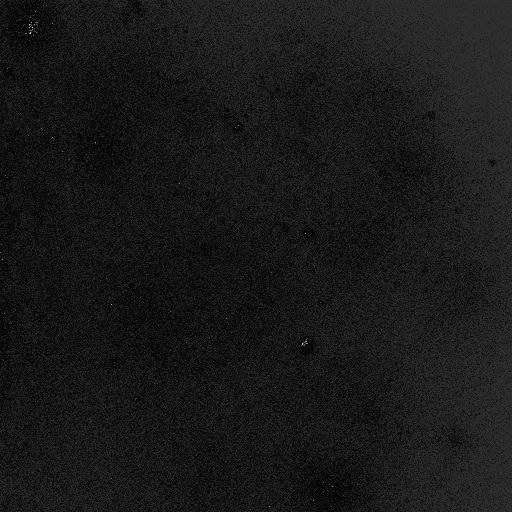
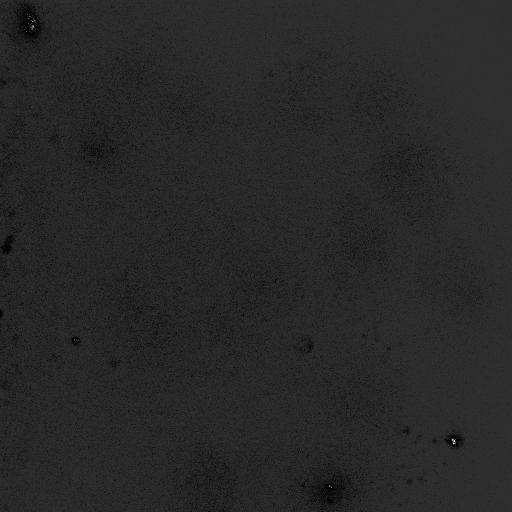
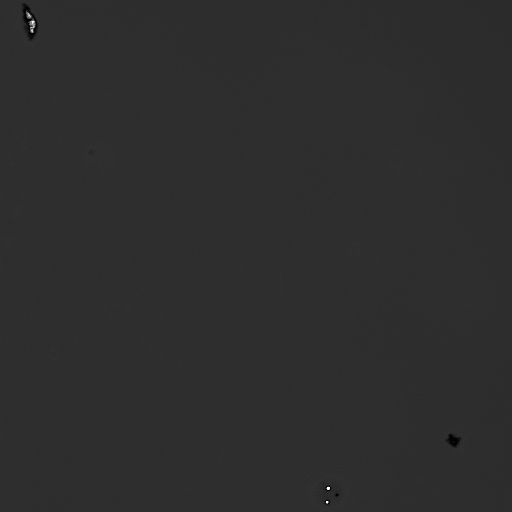
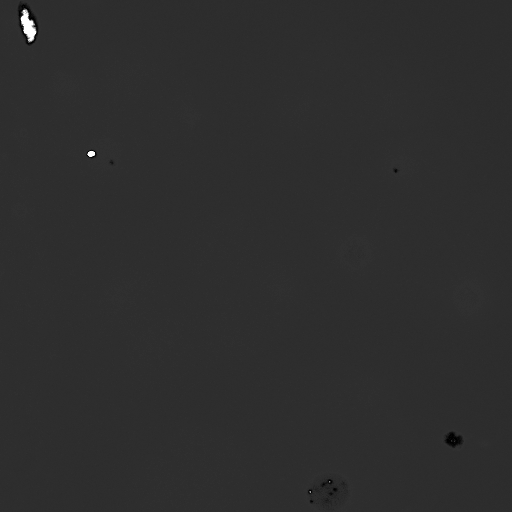
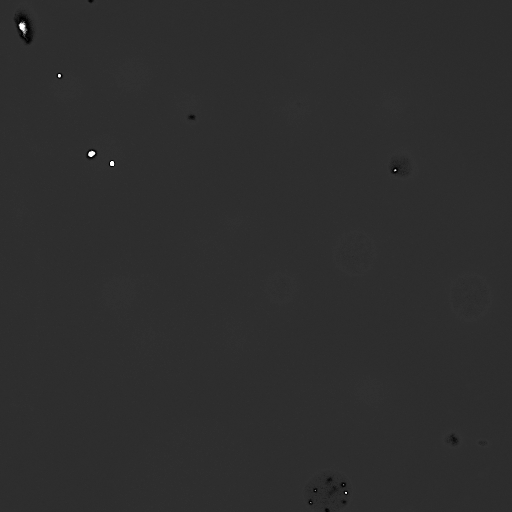
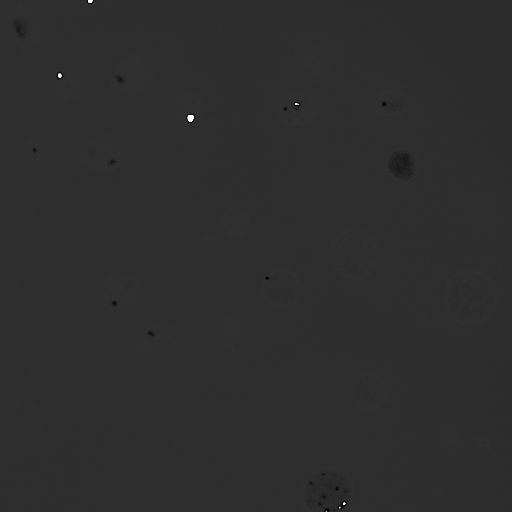
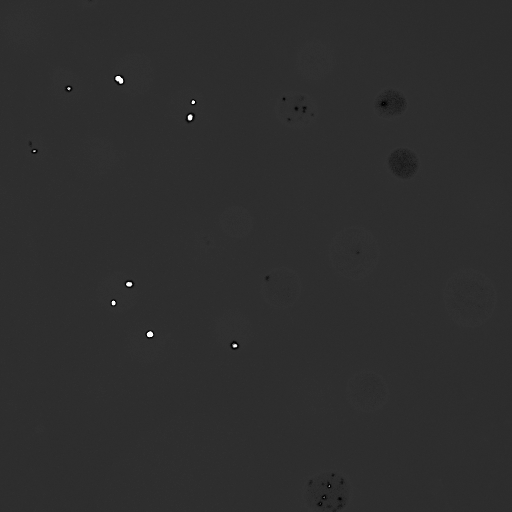
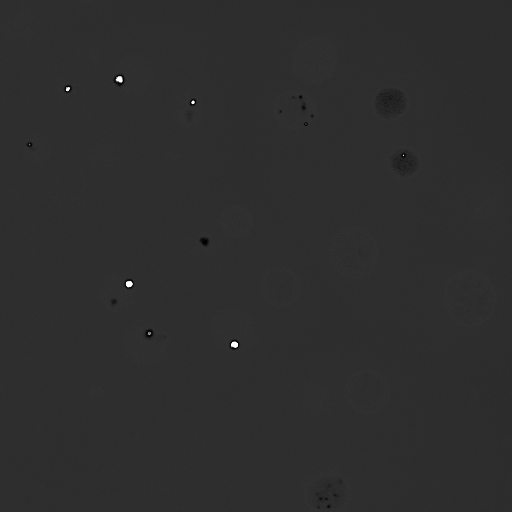
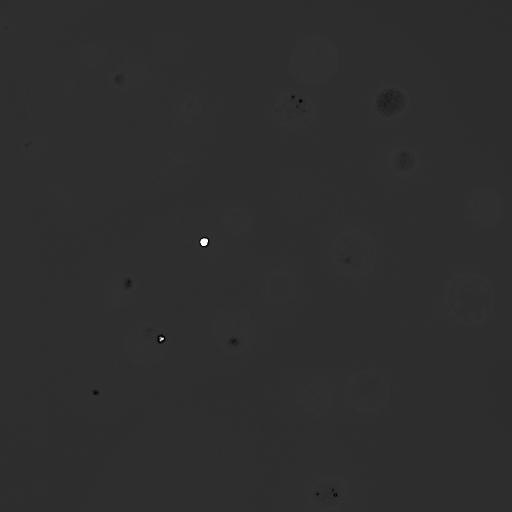
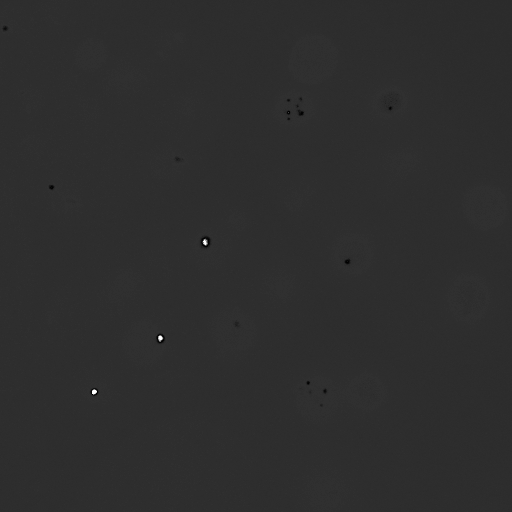
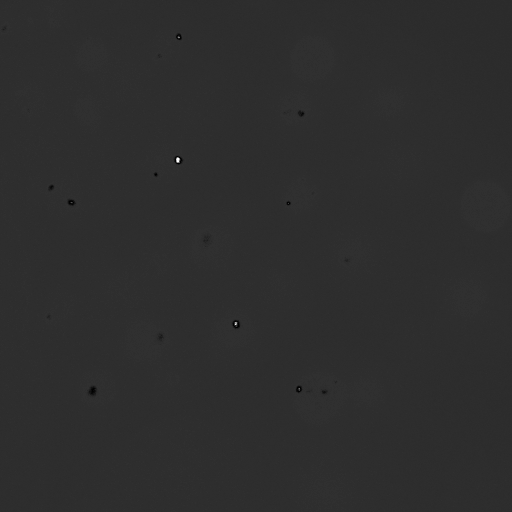
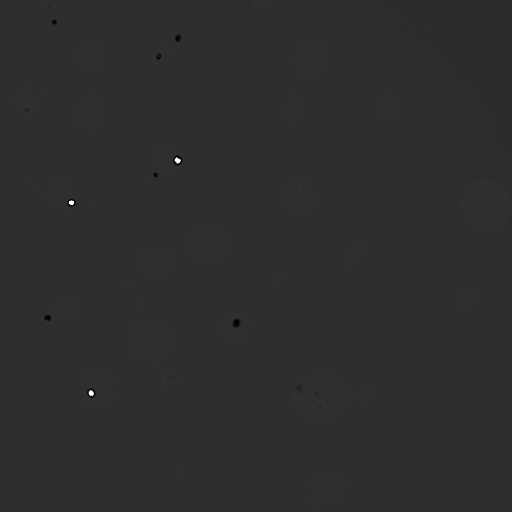
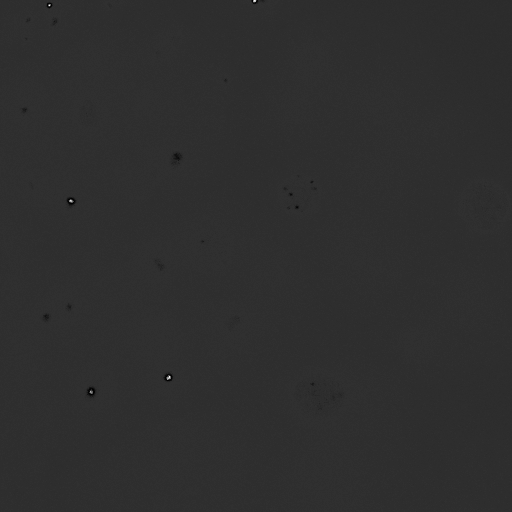
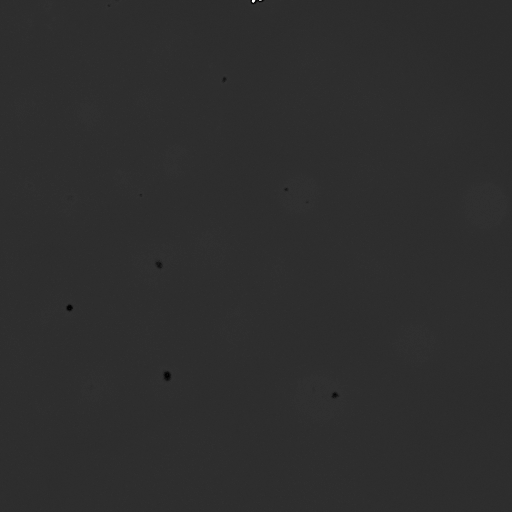
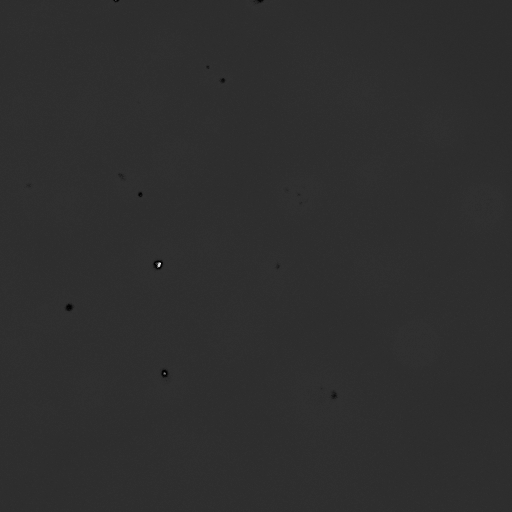
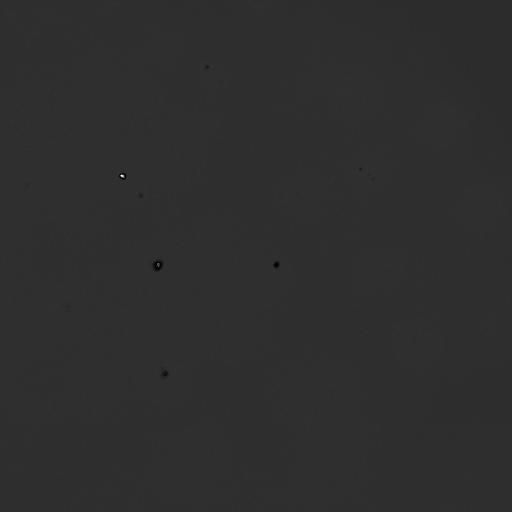
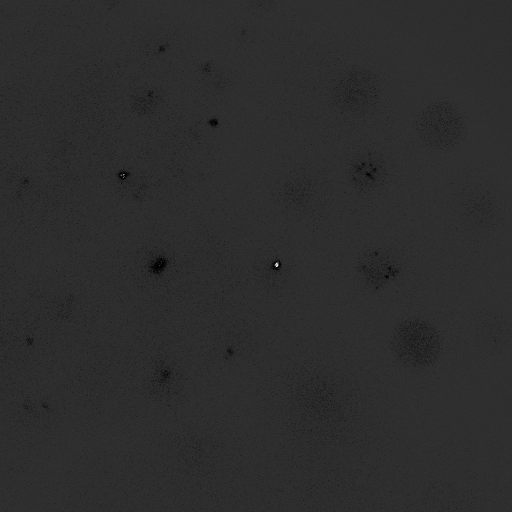
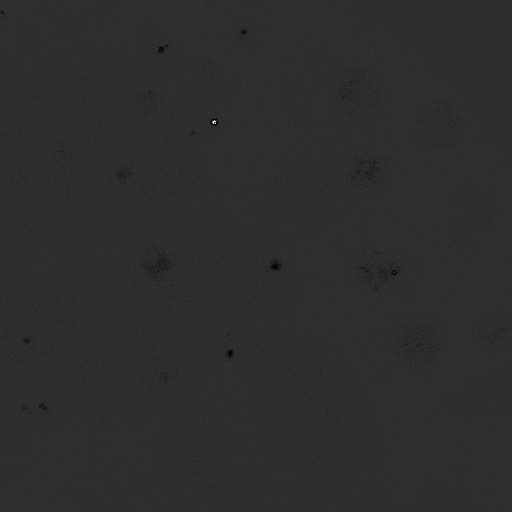
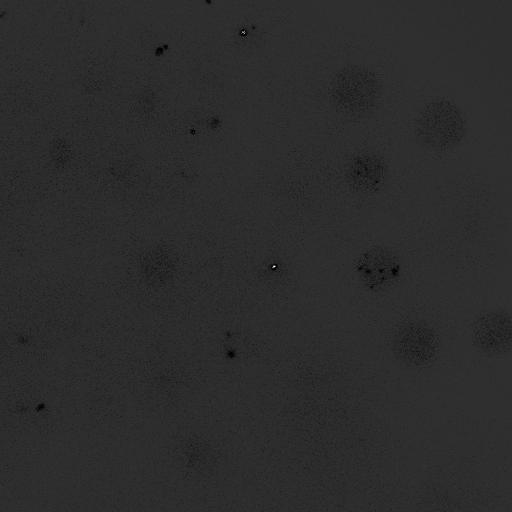
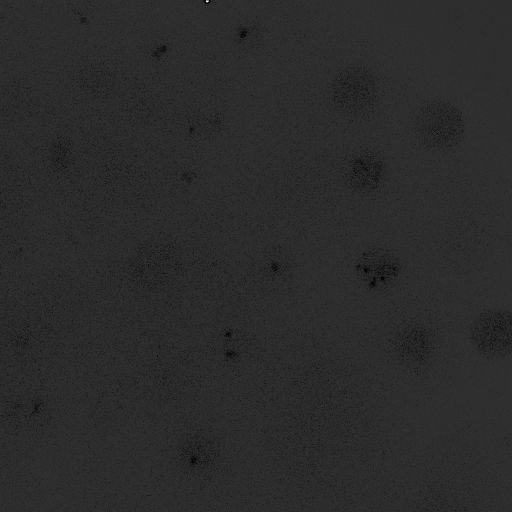

In [443]:
frames_3d[7]

In [453]:
features = tp.locate(frames_3d[7], diameter=(5,5,3))

In [454]:
features.head()

z   y   x  mass  size_z  size_y  size_x  ecc  signal  raw_mass      ep_z  \
0 NaN NaN NaN   NaN     NaN     NaN     NaN  NaN     NaN       NaN -0.657420   
1 NaN NaN NaN   NaN     NaN     NaN     NaN  NaN     NaN       NaN -0.579470   
2 NaN NaN NaN   NaN     NaN     NaN     NaN  NaN     NaN       NaN -0.599789   
3 NaN NaN NaN   NaN     NaN     NaN     NaN  NaN     NaN       NaN -0.670302   
4 NaN NaN NaN   NaN     NaN     NaN     NaN  NaN     NaN       NaN -0.225011   

       ep_y      ep_x  frame  
0 -0.657420 -0.248482      7  
1 -0.579470 -0.219019      7  
2 -0.599789 -0.226699      7  
3 -0.670302 -0.253350      7  
4 -0.225011 -0.085046      7